<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 31/03/2022
- Convocatoria 2 - 07/04/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

### 1. Lectura Data

### 1.1 Atletas y resultados de medallas desde 1896 a 2016

Lectura de datos

In [988]:
import pandas as pd
 
# Especificamos la ubicación del archivo CSV
file = 'athlete_events.csv'

# Leemos el archivo CSV y creamos un DataFrame
df_csv_atletas_info = pd.read_csv(file)  

In [989]:
# Eliminar filas con NaN en la columna "Medal"
df_cleaned = df_csv_atletas_info.dropna(subset=['Medal'])

#Filtramos entre entre 1896 y 2016
df_filtered_by_year = df_cleaned[(df_cleaned['Year'] >= 1896) & (df_cleaned['Year'] <= 2016)]

#Seleccionamos columnas 'Name', 'Year' y 'Medal'
df_athlete_data_filtered = df_filtered_by_year[['Name', 'Year', 'Medal']]

# Mostrar el DataFrame resultante
display(df_athlete_data_filtered)

,Name,Year,Medal
3,Edgar Lindenau Aabye,1900,Gold
37,Arvo Ossian Aaltonen,1920,Bronze
38,Arvo Ossian Aaltonen,1920,Bronze
40,Juhamatti Tapio Aaltonen,2014,Bronze
41,Paavo Johannes Aaltonen,1948,Bronze
...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),1956,Silver
271080,Galina Ivanovna Zybina (-Fyodorova),1964,Bronze
271082,Bogusaw Zych,1980,Bronze
271102,Olesya Nikolayevna Zykina,2000,Bronze


### 1.2 Resultados de atletismo, desde 1896 a 2016

Lectura de datos

In [990]:
import pandas as pd
 
# Especificamos la ubicación del archivo CSV
file2 = 'rdata.csv' 
# Leer el archivo CSV con delimitador personalizado
df_csv_results = pd.read_csv(file2, delimiter=';')   

In [991]:
# Filtrar los resultados de atletismo desde 1896 hasta 2016
filtro_1 = df_csv_results[(df_csv_results['Year'] >= 1896) & (df_csv_results['Year'] <= 2016)]

#Seleccionamos columnas 'Name', 'Year' y 'Medal'
df_atletismo_filtered = filtro_1[['Name', 'Gender', 'Year','Medal','Result','Nationality']]

# Ver los resultados de atletismo
display(df_atletismo_filtered)

,Name,Gender,Year,Medal,Result,Nationality
0,Mohamed FARAH,M,2016,G,25:05.17,USA
1,Paul Kipngetich TANUI,M,2016,S,27:05.64,KEN
2,Tamirat TOLA,M,2016,B,27:06.26,ETH
3,Kenenisa BEKELE,M,2008,G,27:01.17,ETH
4,Sileshi SIHINE,M,2008,S,27:02.77,ETH
...,...,...,...,...,...,...
2389,Hrysopiyi DEVETZI,W,2004,S,15.25,GRE
2390,Tatyana LEBEDEVA,W,2004,B,15.14,RUS
2391,Inessa KRAVETS,W,1996,G,15.33,UKR
2392,Inna LASOVSKAYA,W,1996,S,14.98,RUS


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

### 2.1 Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes

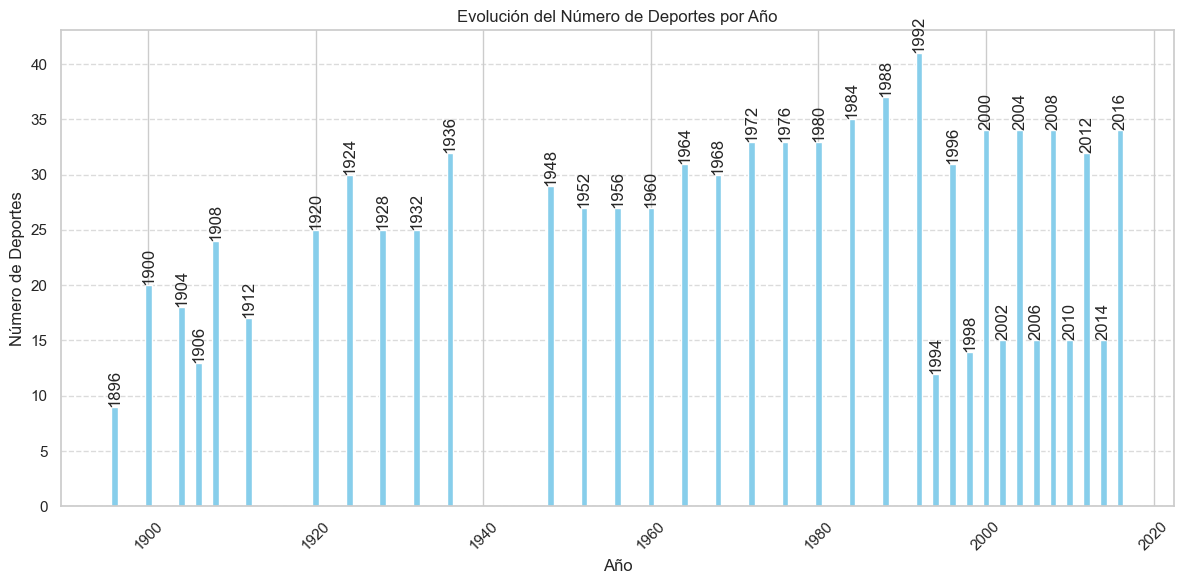

In [992]:
import matplotlib.pyplot as plt
 
# Agrupamos por año y contamos el número de deportes únicos por año con nunique
conteo_deportes_por_año = df_filtered_by_year.groupby('Year')['Sport'].nunique()

# Creamos el gráfico de barras con Matplotlib
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
bars = plt.bar(conteo_deportes_por_año.index, conteo_deportes_por_año.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Número de Deportes')
plt.title('Evolución del Número de Deportes por Año')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Agregamos el año y la letra vertical sobre cada barra
for bar, año, deportes in zip(bars, conteo_deportes_por_año.index, conteo_deportes_por_año.values):
    plt.text(bar.get_x() + bar.get_width() / 2, deportes, str(año), ha='center', va='bottom', rotation='vertical')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


### 2.2. Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo

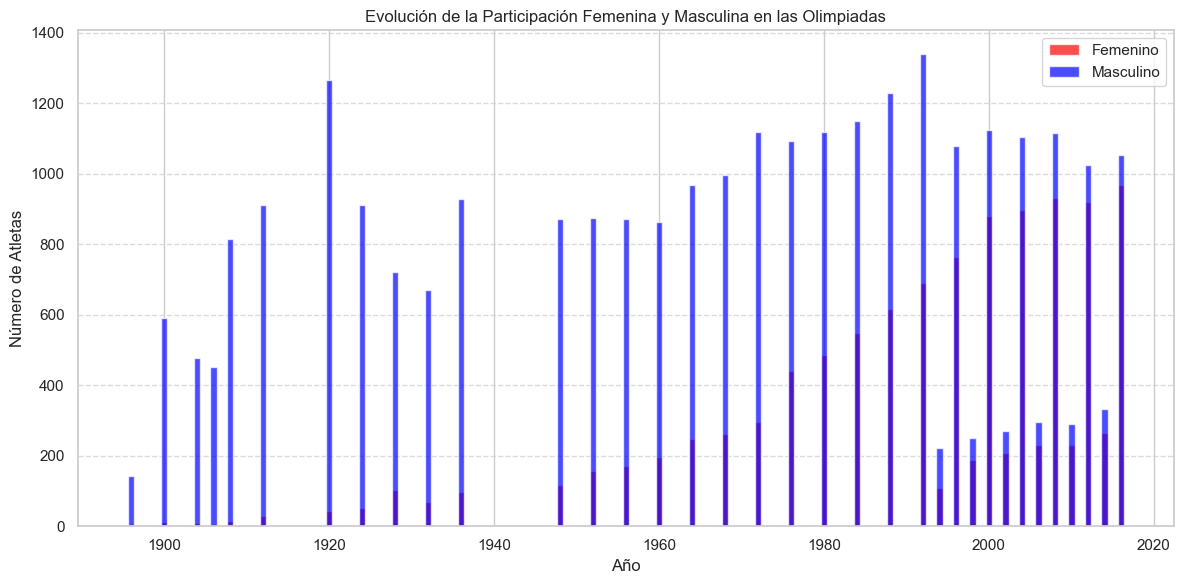

In [993]:
import pandas as pd
import matplotlib.pyplot as plt

#Dataframe filtrada por año previamente
df=df_filtered_by_year
# Filtramos el DataFrame para obtener solo los registros de atletas femeninas
mujeres = df[df['Sex'] == 'F']

# Contamos el número de atletas femeninas por año
conteo_mujeres_por_año = mujeres.groupby('Year')['Name'].count()

# Filtramos el DataFrame para obtener solo los registros de los atletas masculinos
hombres = df[df['Sex'] == 'M']

# Contamos el número de atletas masculinos por año
conteo_hombres_por_año = hombres.groupby('Year')['Name'].count()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

#Creamos Barras para atletas femeninas (color rojo)
plt.bar(conteo_mujeres_por_año.index, conteo_mujeres_por_año.values, color='red', alpha=0.7, label='Femenino')

#Creamos Barras para atletas masculinos (color azul)
plt.bar(conteo_hombres_por_año.index, conteo_hombres_por_año.values, color='blue', alpha=0.7, label='Masculino')

plt.xlabel('Año')
plt.ylabel('Número de Atletas')
plt.title('Evolución de la Participación Femenina y Masculina en las Olimpiadas')
plt.legend()  # Mostrar leyenda
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula horizontal
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### 2.3 Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais

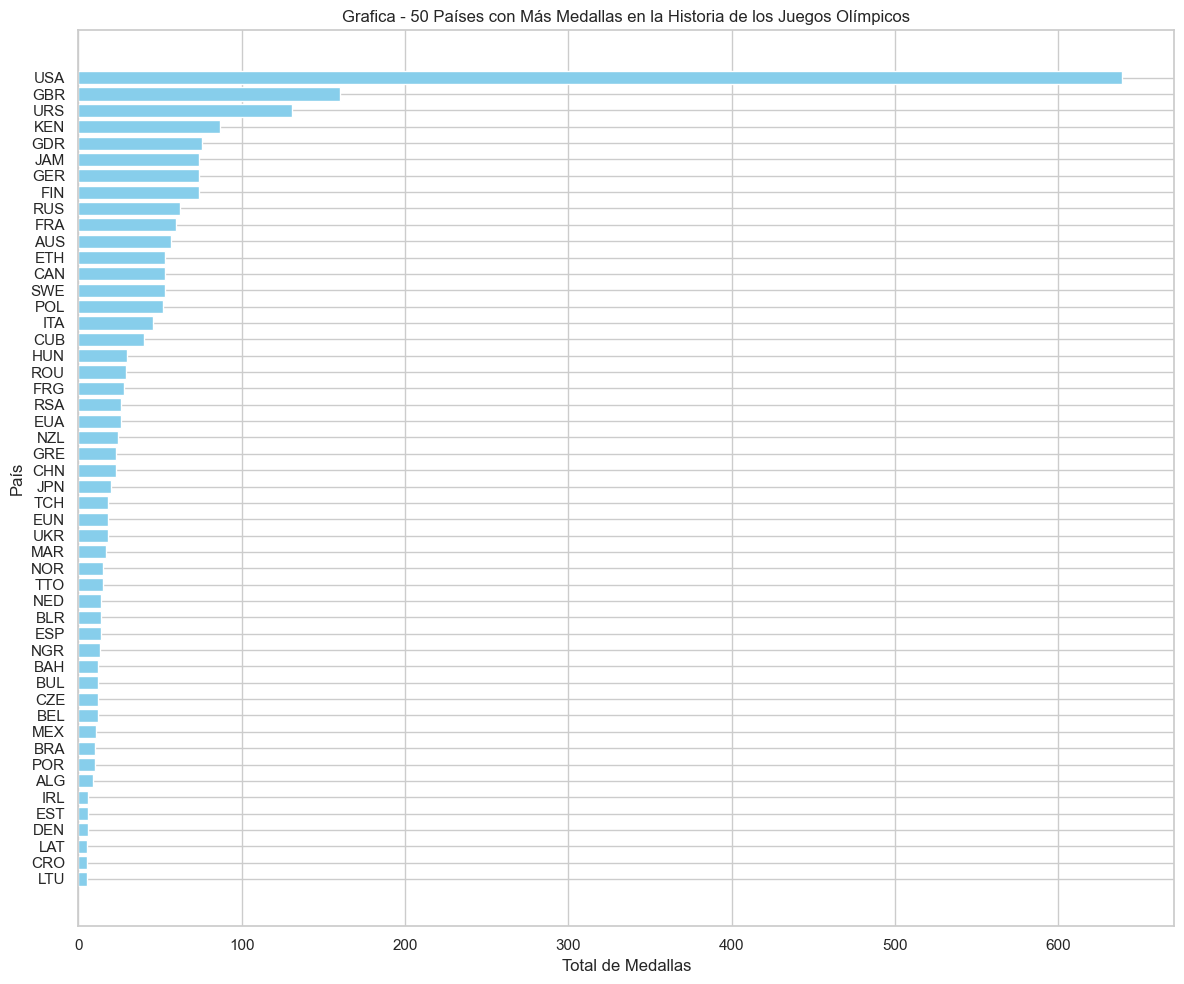

In [994]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con las columnas 'Medal', 'Nationality' y otras
df =df_csv_results
# Filtrar el DataFrame para obtener solo los registros con medallas
df_medallas = df[df['Medal'].notnull()]

# Contamos el número de medallas por país
conteo_medallas_por_pais = df_medallas['Nationality'].value_counts().head(50)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 10))  # Tamaño del gráfico

# Establecemos las Barras con el nombre completo del país y longitud según el total de medallas
plt.barh(conteo_medallas_por_pais.index, conteo_medallas_por_pais.values, color='skyblue')

plt.xlabel('Total de Medallas')
plt.ylabel('País')
plt.title('Grafica - 50 Países con Más Medallas en la Historia de los Juegos Olímpicos')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el país con más medallas esté en la parte superior

plt.tight_layout()

# Mostramos el gráfico
plt.show()


### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

## Tratamiento de datos: Archivo 1 CSV

ARCHIVO CSV 1: Lectura de CSV - Informacion de atletas

In [995]:
# Especificamos la ubicación del archivo CSV
file = 'athlete_events.csv'
# Leemos el archivo CSV y creamos un DataFrame
df_csv_atletas_info = pd.read_csv(file)  

ARCHIVO CSV 1:Obtencion de nombre de columnas

In [996]:
print(df_csv_atletas_info.columns.tolist())

['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


ARCHIVO CSV 1:Limpieza de datos con NaN
Como variables independientes tenemos a Sex,Age,Height,Weight, y estos no pueden tener valores NaN, y la variable Year,Medal coincide con el archivo 2 csv, y sera empleado para tener el dataframe final, asi que tampoco puede tener valores NaN

In [997]:
import pandas as pd 

# Elimina las columnas que contienen NaN en cualquiera de las columnas especificadas
df_csv_atletas_info_sinNaN = df_csv_atletas_info.dropna(subset=['Sex', 'Age', 'Height', 'Weight', 'Year', 'Medal','Sport','Event']) 

## Tratamiento de datos: Archivo 2 CSV

ARCHIVO CSV2: - Resultados de atletas

In [998]:
# Especificamos la ubicación del archivo CSV
file2 = 'rdata.csv' 
# Leer el archivo CSV con delimitador personalizado
df_csv_results = pd.read_csv(file2, delimiter=';')
 

ARCHIVO CSV 2:Obtencion de nombre de columnas

In [999]:
print(df_csv_results.columns.tolist())

['Gender', 'Event', 'Location', 'Year', 'Medal', 'Name', 'Nationality', 'Result', 'Column1']


ARCHIVO CSV 2:Limpieza de datos con NaN
Necesitamos esencialmente que Year, Medal no tenga valores NaN ya que posteriormente se asociaran interseccion  con el otro dataframe

In [1000]:
# Elimina las columnas que contienen NaN en cualquiera de las columnas especificadas
df_csv_results_sinNaN = df_csv_results.dropna(subset=['Year', 'Medal']) 

## TRATAMIENTO DE DATOS: UNION INTERNA

### SELECCION DE COLUMNAS - CSV ATLETAS INFO

In [1001]:
#Seleccionamos las columnas requeridas
df_csv_atletas_info_sel=df_csv_atletas_info[['Sex','Age','Height','Weight','Year','Medal','Sport','Event']] 
display(df_csv_atletas_info_sel)

,Sex,Age,Height,Weight,Year,Medal,Sport,Event
0,M,24.0,180.0,80.0,1992,NaN,Basketball,Basketball Men's Basketball
1,M,23.0,170.0,60.0,2012,NaN,Judo,Judo Men's Extra-Lightweight
2,M,24.0,NaN,NaN,1920,NaN,Football,Football Men's Football
3,M,34.0,NaN,NaN,1900,Gold,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,F,21.0,185.0,82.0,1988,NaN,Speed Skating,Speed Skating Women's 500 metres
...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,1976,NaN,Luge,Luge Mixed (Men)'s Doubles
271112,M,27.0,176.0,59.0,2014,NaN,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,M,27.0,176.0,59.0,2014,NaN,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,M,30.0,185.0,96.0,1998,NaN,Bobsleigh,Bobsleigh Men's Four


Mostramos todos los deportes que existen, de los cuales seleccionaremos lo relacion a 100 metros lisos

In [1002]:
print(df_csv_atletas_info_sel['Sport'].unique().tolist())

['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating', 'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics', 'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting', 'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby', 'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo', 'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol', 'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics']


Filtramos los deportes, en este caso solo requerimos "Athletics" ,debido que es una prueba de 100 metros lisos

In [1003]:
df_csv_atletas_info_sel = df_csv_atletas_info_sel[df_csv_atletas_info_sel['Sport']=='Athletics']
display(df_csv_atletas_info_sel)
valores_unicos=df_csv_atletas_info_sel['Sport'].unique()
print(f'Valores unicos en Sport: {valores_unicos}')

,Sex,Age,Height,Weight,Year,Medal,Sport,Event
26,F,18.0,168.0,NaN,1932,NaN,Athletics,Athletics Women's 100 metres
27,F,18.0,168.0,NaN,1932,NaN,Athletics,Athletics Women's 4 x 100 metres Relay
57,M,31.0,189.0,130.0,2000,NaN,Athletics,Athletics Men's Shot Put
94,M,24.0,174.0,70.0,1936,NaN,Athletics,Athletics Men's Pole Vault
95,M,23.0,NaN,NaN,1912,NaN,Athletics,Athletics Men's High Jump
...,...,...,...,...,...,...,...,...
271079,F,29.0,168.0,80.0,1960,NaN,Athletics,Athletics Women's Shot Put
271080,F,33.0,168.0,80.0,1964,Bronze,Athletics,Athletics Women's Shot Put
271100,M,26.0,NaN,NaN,1928,NaN,Athletics,Athletics Men's Marathon
271102,F,19.0,171.0,64.0,2000,Bronze,Athletics,Athletics Women's 4 x 400 metres Relay


Valores unicos en Sport: ['Athletics']


Filtrado de columnas en Event
-En esta parte como buscamos prueba de 100 metros lisos, buscamos en Event, palabras que contengan "100 metres"

In [1004]:
# Filtra las filas donde la columna 'Event' contiene "100 metres"
eventos_100_metros = df_csv_atletas_info_sel[df_csv_atletas_info_sel['Event'].str.contains("100 metres")]

# Muestra las filas que cumplen con el criterio
df_csv_atletas_info_100metres=eventos_100_metros['Event'].unique().tolist()
print(f'Eventos unicos de 100 metres: ')
for elemento in df_csv_atletas_info_100metres:
    print(f'- {elemento}')
 

Eventos unicos de 100 metres: 
- Athletics Women's 100 metres
- Athletics Women's 4 x 100 metres Relay
- Athletics Men's 4 x 100 metres Relay
- Athletics Men's 100 metres
- Athletics Women's 100 metres Hurdles


In [1005]:
# Creamos un filtro booleano para seleccionar las filas donde la columna 'Event' coincida con los elementos de la lista
filtro_eventos = df_csv_atletas_info_sel['Event'].isin(df_csv_atletas_info_100metres)

# Aplica el filtro para obtener el DataFrame resultante
df_csv_atletas_filter_byEvent = df_csv_atletas_info_sel[filtro_eventos]

# Muestra el DataFrame resultante
display(df_csv_atletas_filter_byEvent)

,Sex,Age,Height,Weight,Year,Medal,Sport,Event
26,F,18.0,168.0,NaN,1932,NaN,Athletics,Athletics Women's 100 metres
27,F,18.0,168.0,NaN,1932,NaN,Athletics,Athletics Women's 4 x 100 metres Relay
130,M,22.0,177.0,74.0,1920,NaN,Athletics,Athletics Men's 4 x 100 metres Relay
203,M,18.0,168.0,60.0,2004,NaN,Athletics,Athletics Men's 100 metres
215,M,26.0,NaN,NaN,1972,NaN,Athletics,Athletics Men's 100 metres
...,...,...,...,...,...,...,...,...
270993,M,25.0,NaN,NaN,1948,NaN,Athletics,Athletics Men's 4 x 100 metres Relay
271045,M,21.0,175.0,70.0,1980,NaN,Athletics,Athletics Men's 100 metres
271046,M,21.0,175.0,70.0,1980,Silver,Athletics,Athletics Men's 4 x 100 metres Relay
271053,F,23.0,174.0,62.0,2016,NaN,Athletics,Athletics Women's 100 metres


Comprobamos si existe NaN

In [1006]:
def contarNaN(df):
    # Cuenta la cantidad de valores NaN en cada columna
    cantidad_nan_por_columna = df.isna().sum()
    
    # Cuenta la cantidad total de valores NaN 
    cantidad_total_nan = df.isna().sum().sum()
    
    # Imprime la cantidad de valores NaN por columna
    print("Cantidad de NaN por columna:")
    print(cantidad_nan_por_columna)
    
    # ImprimIMOS la cantidad total de valores NaN
    print("Cantidad total de NaN en el DataFrame:", cantidad_total_nan)

contarNaN(df_csv_atletas_filter_byEvent)

Cantidad de NaN por columna:
Sex          0
Age        165
Height    1023
Weight    1080
Year         0
Medal     5744
Sport        0
Event        0
dtype: int64
Cantidad total de NaN en el DataFrame: 8012


Eliminacion de datos que contengan valores  NAN en Age,Height,Weight,Medal

In [1007]:
# Elimina las filas con NaN en la columna 'Age'
df_csv_atletas_sinnan = df_csv_atletas_filter_byEvent.dropna(subset=['Age','Height','Weight','Medal'])
# Muestra el DataFrame resultante
contarNaN(df_csv_atletas_sinnan)

Cantidad de NaN por columna:
Sex       0
Age       0
Height    0
Weight    0
Year      0
Medal     0
Sport     0
Event     0
dtype: int64
Cantidad total de NaN en el DataFrame: 0


### SELECCION DE COLUMNAS -CSV RESULTS

### Cambio de Nombre en columna Gender
Cambiamos el nombre de Gender por Sex, para que pueda coincidir con el anterior archivo csv

In [1008]:
df_csv_results_sel=df_csv_results[['Gender','Year','Medal','Result']]
#Cambiamos el nombre de Gender a Sex para uniformizar
df_csv_results_sel = df_csv_results_sel.rename(columns={'Gender': 'Sex'})
display(df_csv_results_sel)
 

,Sex,Year,Medal,Result
0,M,2016,G,25:05.17
1,M,2016,S,27:05.64
2,M,2016,B,27:06.26
3,M,2008,G,27:01.17
4,M,2008,S,27:02.77
...,...,...,...,...
2389,W,2004,S,15.25
2390,W,2004,B,15.14
2391,W,1996,G,15.33
2392,W,1996,S,14.98


Verificamos si existe valores nan

In [1009]:
contarNaN(df_csv_results_sel)

Cantidad de NaN por columna:
Sex        0
Year       0
Medal      0
Result    43
dtype: int64
Cantidad total de NaN en el DataFrame: 43


Eliminamos valores nan de Result

In [1010]:
df_csv_results_sel_sinnan = df_csv_results_sel.dropna(subset=['Result'])
# Muestra el DataFrame resultante
contarNaN(df_csv_results_sel_sinnan) 

Cantidad de NaN por columna:
Sex       0
Year      0
Medal     0
Result    0
dtype: int64
Cantidad total de NaN en el DataFrame: 0


Normalizamos a Minutos los valores de la columna RESULT que contienen formato Minutos,Segundos y Decimales

In [1031]:
import pandas as pd

def calcular_resultados_minutos(row):
    if row['Minutos'] == 0 and row['Segundos'] == 0 and row['Decimales'] == 0:
        return row['Result']
    else:
        return round(row['Minutos'] + row['Segundos'] / 60 + row['Decimales'] / 60, 2)
    
def procesar_resultados(dataframe):
    # Copia explícita del DataFrame
    dataframe = dataframe.copy()
    
    # Utilizamos expresiones regulares para encontrar el patrón
    patron = r'(\d{2}):(\d{2}).(\d{2})'
    dataframe['Result'] = dataframe['Result'].str.replace(r'\.', ':')  # Reemplazar puntos por dos puntos
    dataframe[['Minutos', 'Segundos', 'Decimales']] = dataframe['Result'].str.extract(patron)
    # Llenamos los valores NaN con ceros, a modo de inicializarlos
    dataframe['Minutos'].fillna('00', inplace=True)
    dataframe['Segundos'].fillna('00', inplace=True)
    dataframe['Decimales'].fillna('00', inplace=True)

    # Convertimos los valores a minutos, segundos y decimales en formato int y float
    dataframe['Minutos'] = dataframe['Minutos'].astype(int)
    dataframe['Segundos'] = dataframe['Segundos'].astype(int)
    dataframe['Decimales'] = dataframe['Decimales'].astype(float)
    
    # Actualizamos Result_Minutos cuando Minutos, Segundos y Decimales son 0
    dataframe['Result_Minutos'] = dataframe.apply(calcular_resultados_minutos, axis=1)

    return dataframe
 
# Llamar a la función y obtener el DataFrame resultante
df_resultante = procesar_resultados(df_csv_results_sel_sinnan)

# Imprimir el DataFrame resultante
display(df_resultante)


,Sex,Year,Medal,Result,Minutos,Segundos,Decimales,Result_Minutos
0,M,2016,Gold,25:05.17,25,5,17.0,25.37
1,M,2016,Silver,27:05.64,27,5,64.0,28.15
2,M,2016,Bronze,27:06.26,27,6,26.0,27.53
3,M,2008,Gold,27:01.17,27,1,17.0,27.3
4,M,2008,Silver,27:02.77,27,2,77.0,28.32
...,...,...,...,...,...,...,...,...
2389,W,2004,Silver,15.25,0,0,0.0,15.25
2390,W,2004,Bronze,15.14,0,0,0.0,15.14
2391,W,1996,Gold,15.33,0,0,0.0,15.33
2392,W,1996,Silver,14.98,0,0,0.0,14.98


### Verificacion y Reemplazo de Valores unicos de Medal en CSV ATLETAS INFO
Extraemos los nombres de los valores correspondientes a Medal del file csv atletas info, esto debido a que el otro archivo a fusionar solo contiene Iniciales del nombres y requerimos que ambos csv coincidan para que este uniformizado

In [1013]:
# Imprimir los valores únicos de la columna "Medal"
valores_unicos_medal = df_csv_atletas_sinnan['Medal'].unique()
# Imprimir la lista de valores únicos
print(valores_unicos_medal)

['Gold' 'Silver' 'Bronze']


En lo siguiente reemplazamos en csv results, las iniciales con los valores encontrados en el resultado anterior: Bronze,Gold,Silver

In [1014]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df_csv_results_sel_sinnan

# Reemplaza los valores en la columna "Medal" usando .loc[]
df_csv_results_sel_sinnan.loc[:, 'Medal'] = df_csv_results_sel_sinnan['Medal'].replace({'G': 'Gold', 'S': 'Silver', 'B': 'Bronze'})

# Imprime el DataFrame actualizado
display(df_csv_results_sel_sinnan)


,Sex,Year,Medal,Result
0,M,2016,Gold,25:05.17
1,M,2016,Silver,27:05.64
2,M,2016,Bronze,27:06.26
3,M,2008,Gold,27:01.17
4,M,2008,Silver,27:02.77
...,...,...,...,...
2389,W,2004,Silver,15.25
2390,W,2004,Bronze,15.14
2391,W,1996,Gold,15.33
2392,W,1996,Silver,14.98


### Union de 02 archivos csv por Sex,Year,Medal 
Como tenemos 02 archivos CSV donde solo Sex,Year,Medal son columnas en comun, usaremos dichas columnas para poder filtrar y obtener un dataframe donde csv results tengan los mismos valores en comun con csv atletas.

In [1015]:
import pandas as pd

# Supongamos que tienes los DataFrames df_csv_results_sel_sinnan y df_csv_atletas_sinnan

# Realizar una unión interna basándonos en las columnas comunes 'Sex', 'Year', y 'Medal'
df_merged = pd.merge(df_csv_results_sel_sinnan, df_csv_atletas_sinnan, on=['Sex', 'Year', 'Medal'], how='inner')

# Ahora df_merged contiene la combinación de ambos DataFrames basándose en las columnas 'Sex', 'Year', y 'Medal' con una unión interna
display(df_merged)

,Sex,Year,Medal,Result,Age,Height,Weight,Sport,Event
0,M,2016,Gold,25:05.17,26.0,183.0,77.0,Athletics,Athletics Men's 4 x 100 metres Relay
1,M,2016,Gold,25:05.17,24.0,193.0,84.0,Athletics,Athletics Men's 4 x 100 metres Relay
2,M,2016,Gold,25:05.17,26.0,180.0,80.0,Athletics,Athletics Men's 4 x 100 metres Relay
3,M,2016,Gold,25:05.17,29.0,196.0,95.0,Athletics,Athletics Men's 100 metres
4,M,2016,Gold,25:05.17,29.0,196.0,95.0,Athletics,Athletics Men's 4 x 100 metres Relay
...,...,...,...,...,...,...,...,...,...
7237,M,1988,Bronze,2:10:59,23.0,193.0,83.0,Athletics,Athletics Men's 4 x 100 metres Relay
7238,M,1988,Bronze,2:10:59,24.0,183.0,78.0,Athletics,Athletics Men's 4 x 100 metres Relay
7239,M,1988,Bronze,2:10:59,22.0,183.0,74.0,Athletics,Athletics Men's 4 x 100 metres Relay
7240,M,1988,Bronze,2:10:59,23.0,187.0,84.0,Athletics,Athletics Men's 4 x 100 metres Relay


### Seleccion de columnas 

In [1016]:
# Seleccionar las columnas específicas de interés
columnas_de_interes = ['Sex', 'Age', 'Height', 'Weight', 'Sport', 'Event', 'Result']
df_resultante = df_merged[columnas_de_interes]

# Mostrar el nuevo DataFrame resultante
display(df_resultante)


,Sex,Age,Height,Weight,Sport,Event,Result
0,M,26.0,183.0,77.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
1,M,24.0,193.0,84.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
2,M,26.0,180.0,80.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
3,M,29.0,196.0,95.0,Athletics,Athletics Men's 100 metres,25:05.17
4,M,29.0,196.0,95.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
...,...,...,...,...,...,...,...
7237,M,23.0,193.0,83.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59
7238,M,24.0,183.0,78.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59
7239,M,22.0,183.0,74.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59
7240,M,23.0,187.0,84.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59


In [1017]:
# Obtener los valores únicos de la columna "Sport"
valores_unicos_sport = df_resultante['Sport'].unique()

# Imprimir los valores únicos
print(valores_unicos_sport)


['Athletics']


In [1018]:
# Obtener los valores únicos de la columna "Sport"
valores_unicos_sport = df_resultante['Event'].unique()

# Imprimir los valores únicos
print(valores_unicos_sport)


["Athletics Men's 4 x 100 metres Relay" "Athletics Men's 100 metres"]


In [1019]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df

# Filtra las filas donde la columna 'Event' contiene "100 metres"
eventos_100_metros = df_resultante[df_resultante['Event'].str.contains("100 metres")]

# Muestra las filas que cumplen con el criterio
display(eventos_100_metros)
# Obtén los eventos únicos
eventos_unicos_100_metros = eventos_100_metros['Event'].unique()

# Imprime los eventos únicos
for evento in eventos_unicos_100_metros:
    print(evento) 


# Obtén los eventos únicos
sportunicos = eventos_100_metros['Sport'].unique()

# Imprime los eventos únicos
for sp in sportunicos:
    print(sp) 




,Sex,Age,Height,Weight,Sport,Event,Result
0,M,26.0,183.0,77.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
1,M,24.0,193.0,84.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
2,M,26.0,180.0,80.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
3,M,29.0,196.0,95.0,Athletics,Athletics Men's 100 metres,25:05.17
4,M,29.0,196.0,95.0,Athletics,Athletics Men's 4 x 100 metres Relay,25:05.17
...,...,...,...,...,...,...,...
7237,M,23.0,193.0,83.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59
7238,M,24.0,183.0,78.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59
7239,M,22.0,183.0,74.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59
7240,M,23.0,187.0,84.0,Athletics,Athletics Men's 4 x 100 metres Relay,2:10:59


Athletics Men's 4 x 100 metres Relay
Athletics Men's 100 metres
Athletics
